In [1]:
import pandas as pd
import numpy as np
import gc, warnings
warnings.filterwarnings('ignore')

# Overview
What is this kernel about?
* No predictions to make 
* No features to create

We will load competition data and look closer on it. We will try to understand what we have in our hands and how we can work with it.
* * *

不预测，不做特征工程，单纯的分析

 ## Load train data
 * * *

In [2]:
sale_train = pd.read_csv('../data/sales_train.csv')

We can view basic DafaFrame information. 

As you can see, we do not have broken and nan data that is good.

In [3]:
print("----------Top-5- Record----------")
display(sale_train.head(5))
print("-----------Information-----------")
display(sale_train.info())
print("-----------Data Types-----------")
display(sale_train.dtypes)
print("----------Missing value-----------")
display(sale_train.isnull().sum())
print("----------Null value-----------")
display(sale_train.isna().sum())
print("----------Shape of Data----------")
display(sale_train.shape)

----------Top-5- Record----------


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


None

-----------Data Types-----------


date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

----------Missing value-----------


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

----------Null value-----------


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

----------Shape of Data----------


(2935849, 6)

We have duplicated rows, but I don't think that it is a mistake.

It could be different sales methods or client type, etc.

You can remove it, but I really don't believe that 6 rows of 3m can make the difference.

> 我们有重复的行，但是我不认为这是一个错误。 
>
> 可能是不同的销售方式或客户类型等。 
>
> 您可以删除它，但我真的不相信3m的6行会有所作为。

In [4]:
display(sale_train[sale_train.duplicated()])
print('Number of duplicates:', len(sale_train[sale_train.duplicated()]))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


Number of duplicates: 6


I can advise downcasting your DataFrame. It will save you some memory, and believe me you will need all memory possible.

In our case from 134.4+ MB, we went to 61.6+ MB

Not a great deal right now but such approach works with bigger DF also.

#### please see this two links for more tips (I stole that downcast basic snippet from anqitu)))
* https://www.kaggle.com/anqitu/feature-engineer-and-model-ensemble-top-10
* https://www.kaggle.com/yuliagm/how-to-work-with-big-datasets-on-16g-ram-dask

In [5]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

sale_train = downcast_dtypes(sale_train)
print(sale_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float32
item_cnt_day      float32
dtypes: float32(2), int16(3), object(1)
memory usage: 61.6+ MB
None


## 1.1 Item_id
* * *
### Lets group data by item_id and date_block_num and look closer on it.


In [19]:
sales_by_item_id = sale_train.pivot_table(
    index=['item_id'] , values=['item_cnt_day'], 
    columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_item_id.columns = sales_by_item_id.columns.droplevel().map(str)
sales_by_item_id = sales_by_item_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_item_id.columns.values[0] = 'item_id'
sales_by_item_id

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21802,22165,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21803,22166,0,0,0,0,0,0,0,0,0,...,7,8,12,4,8,10,8,11,5,11
21804,22167,0,0,0,0,0,0,0,0,56,...,33,46,40,38,31,33,34,29,21,37
21805,22168,2,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Simple graph
What this graph is telling us. Basically nothing.)) I only see that train data has many old products (degradation line) and many 1c products are seasonal and probably release date depended.

#### I'm not very good with graphs and presentations - there are better data representation examples:
* https://www.kaggle.com/dimitreoliveira/model-stacking-feature-engineering-and-eda
* https://www.kaggle.com/jagangupta/time-series-basics-exploring-traditional-ts

# 季节性数据

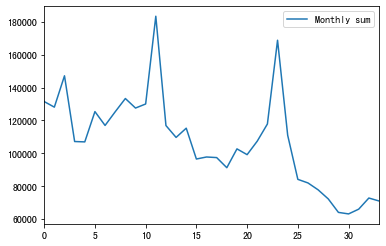

In [22]:
sales_by_item_id.sum()[1:].plot(legend=True, label="Monthly sum")
#plt.show()

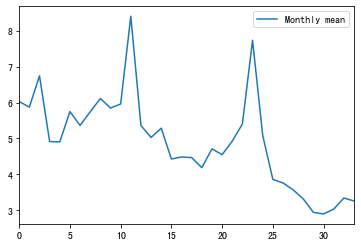

In [23]:
sales_by_item_id.mean()[1:].plot(legend=True, label="Monthly mean")

### Let's see how many products are outdated (no sales for the last 6 months)
12391 of 21807 is a huge number. Probably we can set 0 for all that items and do not make any model prediction.

In [24]:
outdated_items = sales_by_item_id[sales_by_item_id.loc[:,'27':].sum(axis=1)==0]
print('Outdated items:', len(outdated_items))

Outdated items: 12391


### How many outdated items in test set?
6888 - not much but we have such items

In [25]:
test = pd.read_csv('../data/test.csv')
print('Outdated items in test set:', len(test[test['item_id'].isin(outdated_items['item_id'])]))

Outdated items in test set: 6888


### Outliers by price and sales volume
We will get rid of them later

#### please see lovely kernel made by Denis Larionov (I stole few graphs from there)
* https://www.kaggle.com/dlarionov/feature-engineering-xgboost

Sale volume outliers: [ 8057 20949  9242 19437  3731 11373  9249  9248]
Item price outliers: [11365  6066 13199]


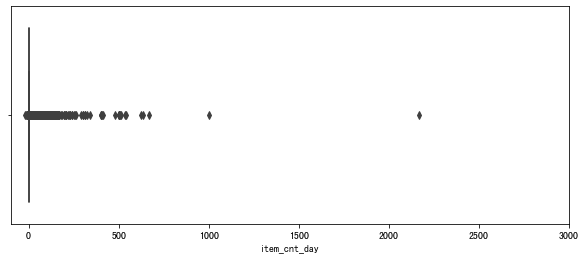

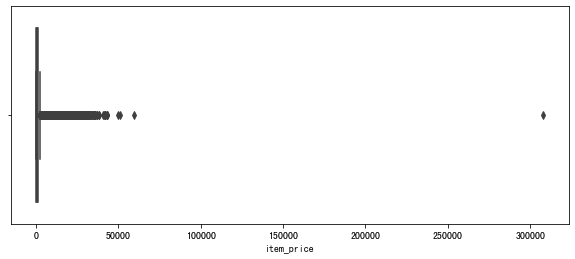

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=sale_train['item_cnt_day'])
print('Sale volume outliers:',sale_train['item_id'][sale_train['item_cnt_day']>500].unique())

plt.figure(figsize=(10,4))
#plt.xlim(-100,  sale_train['item_price'].max())
#plt.xlim(sale_train['item_price'].min(), sale_train['item_price'].max())
sns.boxplot(x=sale_train['item_price'])
print('Item price outliers:',sale_train['item_id'][sale_train['item_price']>50000].unique())

### Possible item_id features:
1. Lags
2. Release date
3. Last month sale
4. Days on sale
5. Neighbors (items with id 1000 and 1001 could be somehow similar - genre, type, release date)

## 1.2 shop_id
* * *
### Lets now group train data by shop_id.
We can see new shops - probably there will be a sales spike (opening event for example).
Apparently closed shops (ill call it "outdated shops")  - no sales for last 6 months.

In [35]:
sales_by_shop_id = sale_train.pivot_table(
    index=['shop_id']
    , values=['item_cnt_day']
    , columns='date_block_num'
    , aggfunc=np.sum
    , fill_value=0
).reset_index()

sales_by_shop_id.columns = sales_by_shop_id.columns.droplevel().map(str)
sales_by_shop_id = sales_by_shop_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_shop_id.columns.values[0] = 'shop_id'

display(sales_by_shop_id)

for i in range(0,33):
    print('Not exists in month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,'0':str(i)].sum(axis=1)==0].unique())

for i in range(0,33):
    # 在 month block i 以后的item_sales_cnt 权威0
    print('Shop is outdated for month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,str(i):].sum(axis=1)==0].unique())


,shop_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,5578,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2947,3364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1146,488,753,583,553,832,807,875,945,...,987,907,762,859,843,804,785,942,822,727
3,3,767,798,959,647,710,784,721,890,1026,...,977,738,741,740,731,672,535,666,745,613
4,4,2114,2025,2060,285,1211,1464,1378,1713,1536,...,1188,980,978,899,893,793,842,947,732,831
5,5,0,877,1355,1008,1110,1393,1265,1510,1298,...,1404,1101,1109,1054,1012,954,991,1294,1092,1052
6,6,3686,4007,4519,3168,3022,3847,3360,3702,4208,...,2328,2329,1981,1998,1748,1539,1484,1575,1725,1802
7,7,2495,2513,2460,1540,1647,2085,2031,2397,2599,...,2084,1847,1430,1340,1217,1235,1327,1409,1287,1212
8,8,1463,1156,977,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,3186


Not exists in month 0 [ 5  9 11 17 20 33 34 36 39 40 48 49 55 57 58]
Not exists in month 1 [ 9 11 17 20 33 34 36 39 40 48 49 55 57 58]
Not exists in month 2 [ 9 11 17 20 33 34 36 39 40 48 49 55]
Not exists in month 3 [ 9 11 17 20 33 34 36 39 40 48 49 55]
Not exists in month 4 [ 9 11 17 20 33 34 36 39 40 48 49]
Not exists in month 5 [ 9 11 20 33 34 36 39 40 48 49]
Not exists in month 6 [ 9 11 20 33 34 36 39 40 48 49]
Not exists in month 7 [ 9 11 20 33 34 36 39 40 48 49]
Not exists in month 8 [ 9 11 20 33 34 36 39 40 48 49]
Not exists in month 9 [11 20 33 34 36 39 40 48 49]
Not exists in month 10 [11 20 33 34 36 39 40 48 49]
Not exists in month 11 [11 20 33 34 36 39 40 48]
Not exists in month 12 [11 20 33 34 36 39 40 48]
Not exists in month 13 [11 20 33 34 36 39 40 48]
Not exists in month 14 [11 20 33 34 36 48]
Not exists in month 15 [11 20 33 34 36]
Not exists in month 16 [11 20 33 34 36]
Not exists in month 17 [11 20 33 34 36]
Not exists in month 18 [11 20 33 36]
Not exists in month 19

In our test set we have 5100 sales in really new shop and no "outdated shops" but anyway it is good feature for future.

In [38]:
print('Recently opened shop items:', len(test[test['shop_id']==36]))

Recently opened shop items: 5100


In [37]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


### Possible shop_id features
1. Lags (shop_id/shp_cnt_mth)
2. Opening month (possible  opening sales)
3. Closed Month (possible stock elimination)

## 1.3 Price
* * *
### Possible Price features:

1. Price category (1$/10$/20$/ etc.) - obviously (or not obviously),  items with smaller price have greater volumes
2. Discount and Discount duration
3. Price lag (shows discount)
4. Price correction (rubl/usd pair)
5. Shop Revenue

## 1.4 Dates
* * *
### Possible Date features:
1. Weekends and holidays sales (to correct monthly sales)
2. Number of days in the month (to correct monthly sales)
3. Month number (for seasonal items)

## 1.5 Shop info
* * *
The structure of the shop information is evident.
### Shop City | Shop type | Shop name

In [39]:
shops = pd.read_csv('../data/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


With a close look we can find out that some shops have duplicated id/name - probably it changed location (within commercial center), or it has a different type (isle sale point), but I decided to merge it.
> 仔细观察，我们发现有些 id/name 重复-可能是位置更改（在商业中心内），或者类型不同（岛屿销售点），但我决定合并它。

* 11 => 10
* 1  => 58
* 0  => 57
* 40 => 39

I converted train shop_id to shop_id that is in the test set

In [40]:
shops['shop_name'] = shops['shop_name'].apply(lambda x: x.lower()).str.replace('[^\w\s]', '').str.replace('\d+','').str.strip()
shops['shop_city'] = shops['shop_name'].str.partition(' ')[0]
shops['shop_type'] = shops['shop_name'].apply(lambda x: 'мтрц' if 'мтрц' in x else 'трц' if 'трц' in x else 'трк' if 'трк' in x else 'тц' if 'тц' in x else 'тк' if 'тк' in x else 'NO_DATA')
shops.head()

,shop_name,shop_id,shop_city,shop_type
0,якутск орджоникидзе фран,0,якутск,NO_DATA
1,якутск тц центральный фран,1,якутск,тц
2,адыгея тц мега,2,адыгея,тц
3,балашиха трк октябрькиномир,3,балашиха,трк
4,волжский тц волга молл,4,волжский,тц


### Possible Shop features:
1. Shop City
2. Shop Type

## 1.6 Item info
* * *
Let's see what we can get from this file.

In [41]:
items = pd.read_csv('../data/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


We can enconde "features" that many items have.

The structure is always the same

### Item name [category feature] (additional feature)

we can split it, and "one hot encode it."

In [ ]:
# Ugly code to show the idea
from collections import Counter
from operator import itemgetter

items['name_1'], items['name_2'] = items['item_name'].str.split('[', 1).str
items['name_1'], items['name_3'] = items['item_name'].str.split('(', 1).str

items['name_2'] = items['name_2'].str.replace('[^A-Za-z0-9А-Яа-я]+', ' ').str.lower()
items['name_3'] = items['name_3'].str.replace('[^A-Za-z0-9А-Яа-я]+', ' ').str.lower()
items = items.fillna('0')

result_1 = Counter(' '.join(items['name_2'].values.tolist()).split(' ')).items()
result_1 = sorted(result_1, key=itemgetter(1))
result_1 = pd.DataFrame(result_1, columns=['feature', 'count'])
result_1 = result_1[(result_1['feature'].str.len() > 1) & (result_1['count'] > 200)]

result_2 = Counter(' '.join(items['name_3'].values.tolist()).split(" ")).items()
result_2 = sorted(result_2, key=itemgetter(1))
result_2 = pd.DataFrame(result_2, columns=['feature', 'count'])
result_2 = result_2[(result_2['feature'].str.len() > 1) & (result_2['count'] > 200)]

result = pd.concat([result_1, result_2])
result = result.drop_duplicates(subset=['feature'])

print('Most common aditional features:', result)

### Item name correction
For our basic "name feature" it is enough to find identical items (not similar but identical),

In [43]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [42]:
print('Unique item names:', len(items['item_name'].unique()))

Unique item names: 22170


In [44]:
import re
def name_correction(x):
    x = x.lower()
    x = x.partition('[')[0]
    x = x.partition('(')[0]
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x)
    x = x.replace('  ', ' ')
    x = x.strip()
    return x

items['item_name'] = items['item_name'].apply(lambda x: name_correction(x))
items.head()

,item_name,item_id,item_category_id
0,во власти наваждения,0,40
1,abbyy finereader 12 professional edition full,1,76
2,в лучах славы,2,40
3,голубая волна,3,40
4,коробка,4,40


In [45]:
print('Unique item names after correction:', len(items['item_name'].unique()))

Unique item names after correction: 18121


### Possible Item features:
1. Item name
2. Encoded aditional feature 

## 1.7 Category info
* * *
The structure here is
### Section name - subsection
we can split it and have two features from one

In [46]:
categories = pd.read_csv('../data/item_categories.csv')
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


### But I did manual feature extraction here to have four features.
Section / Main Category name / Main SubCategory name / Secondary SubCategory name
#### Аксессуары / PS2	/ PS / 2

### Possible Category features
1. Section
2. Main Category name
3. Main SubCategory name 
4. Secondary SubCategory name


## 1.8 Test Set
* * *
The key to my success was the analysis of Test test data.

We have three groups of items:
1. Item/shop pairs that are in train
2. Items without any data
3. Items that are in train

In [47]:
test = pd.read_csv('../data/test.csv')
good_sales = test.merge(sale_train, on=['item_id','shop_id'], how='left').dropna()
good_pairs = test[test['ID'].isin(good_sales['ID'])]
no_data_items = test[~(test['item_id'].isin(sale_train['item_id']))]

print('1. Number of good pairs:', len(good_pairs))
print('2. No Data Items:', len(no_data_items))
print('3. Only Item_id Info:', len(test)-len(no_data_items)-len(good_pairs))
  

1. Number of good pairs: 111404
2. No Data Items: 15246
3. Only Item_id Info: 87550


#### Is it feature? Yes. We need to apply different prediction approach for each type of items in the test set.

####  For example - "No Data Items" - it is more likely classification task.

### Next part will be about data aggregation and feature preparation.
## To be continued...